# Listening Analysis

Combining Spotify & Last.fm data for exploring habits and trends
Uses two data sources,

1. Last.fm scrobbles
2. Spotify audio features

The two are joined by searching Last.fm tracks on Spotify to get a Uri, the track name and artist name are provided for the query.
These Uris can be used to retrieve Spotify feature descriptors. `all_joined()` gets a BigQuery of that joins the scrobble time series with their audio features and provides this as a panda frame.

Explorations are made from [album](./album.ipynb), [artist](./artist.ipynb) and [playlist](./playlist.ipynb) perspectives. 

In [3]:
scrobbles.dtypes

track                object
album                object
artist               object
uri                  object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
mode                float64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
dtype: object

# Spotify Descriptor

The Spotify API provides access to various characteristics about a track, they are used here for exploring listening habits. The descriptions from the [Spotify API Documentation](https://developer.spotify.com/documentation/web-api/reference/#object-audiofeaturesobject) can be seen below:

### acousticness
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

### danceability
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

### energy
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

### instrumentalness
Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

### key
The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

### liveness
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. 	Float

### loudness
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

### mode
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

### speechiness
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

### tempo
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

### time_signature
An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

### valence
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [4]:
scrobbles.describe()[1:]

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
mean,0.178143,0.589393,2.430387e+05,0.704151,0.238050,5.323999,0.212907,-7.321487,0.570426,0.144195,124.301787,3.954734,0.416501
std,0.254707,0.173309,1.251593e+05,0.210795,0.349545,3.673897,0.170618,3.805300,0.495018,0.135663,30.824885,0.370057,0.238092
min,0.000000,0.000000,2.982700e+04,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.004340,0.472000,1.875410e+05,0.576000,0.000001,2.000000,0.099100,-8.837000,0.000000,0.047100,97.215000,4.000000,0.218000
50%,0.047300,0.601000,2.266320e+05,0.742000,0.002100,6.000000,0.139000,-6.617000,1.000000,0.078400,124.985000,4.000000,0.396000
75%,0.250000,0.722000,2.822180e+05,0.874000,0.528000,9.000000,0.292000,-4.890000,1.000000,0.216000,142.899000,4.000000,0.596000
max,0.996000,0.979000,4.995315e+06,0.999000,0.995000,11.000000,0.995000,3.108000,1.000000,0.966000,248.028000,5.000000,0.988000


In [5]:
scrobbles.sort_index(ascending=False)

,track,album,artist,uri,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
time,,,,,,,,,,,,,,,,,
2021-05-06 22:22:59+00:00,The Enemy (feat. Fat Joe),The Big Picture,Big L,spotify:track:27GWWBegMtuzYixG9JTNrW,0.11500,0.600,168013.0,0.649,0.000190,11.0,0.8240,-8.372,1.0,0.3930,174.130,4.0,0.8770
2021-05-06 22:21:00+00:00,Running Up Freestyle,Fever,Megan Thee Stallion,spotify:track:1YU0fHUCpUyxkWqxx9ivHK,0.00825,0.917,124803.0,0.897,0.000000,10.0,0.2390,-2.297,0.0,0.1190,92.975,4.0,0.3100
2021-05-06 22:15:15+00:00,m.A.A.d city,"good kid, m.A.A.d city (Deluxe)",Kendrick Lamar,spotify:track:3qX1dqmDdmMvvfMVfsx4Bh,0.05380,0.487,350120.0,0.729,0.000004,2.0,0.4400,-6.815,1.0,0.2710,91.048,4.0,0.2170
2021-05-06 22:12:13+00:00,Pony,House Party,Valentino Khan,spotify:track:26AIHH0JMIP8sd7YBM5uWb,0.00027,0.803,210937.0,0.984,0.846000,1.0,0.0434,-3.930,1.0,0.0548,127.994,4.0,0.3710
2021-05-06 22:07:57+00:00,Pull The Trigga,UKF Bass Culture 4,Dommix,spotify:track:0A0NjGXyHELTlBeMZcMyxZ,0.00825,0.789,260930.0,0.891,0.798000,9.0,0.8610,-5.975,1.0,0.1030,129.029,4.0,0.4100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-03 03:28:51+00:00,Site Zero / The Vault,Void,RL Grime,spotify:track:762ME2OHjuGo4xTbfZhpok,0.68300,0.289,464015.0,0.404,0.854000,7.0,0.3280,-12.815,0.0,0.0352,92.873,4.0,0.0285
2017-11-03 02:54:37+00:00,Reminder (feat. How To Dress Well),Void,RL Grime,spotify:track:2JUdMBlA5JzuemLGzZNDrf,0.68300,0.593,260075.0,0.560,0.109000,3.0,0.1040,-7.059,0.0,0.0447,113.895,4.0,0.3630
2017-11-03 02:50:23+00:00,Monsoon,Void,RL Grime,spotify:track:0jYAtTuRsRdHMuvaOXIAj5,0.03460,0.546,254815.0,0.850,0.680000,10.0,0.1120,-3.366,0.0,0.0386,161.996,4.0,0.3020


# What does my listening *"palette"* look like over time 

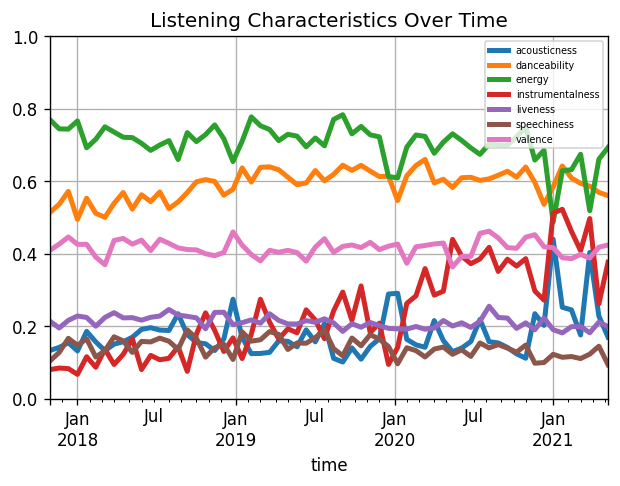

In [6]:
# select only descriptor float columns
filtered_scrobbles = scrobbles[float_headers]
# resample by month and mean
filtered_scrobbles = filtered_scrobbles.resample("3W").mean()

# filtered_scrobbles["instrumentalness"].plot()
filtered_scrobbles.plot(linewidth=3)

plt.title(f'Listening Characteristics Over Time')
plt.legend(loc = "upper right", fontsize = "xx-small")
plt.ylim([0, 1])
plt.grid()
plt.show()

# How much music do I listen to each day?

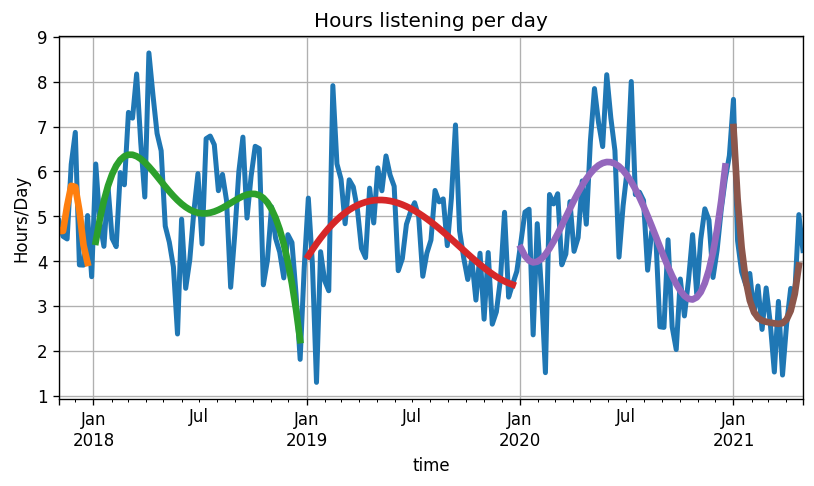

In [7]:
by_day = scrobbles["duration_ms"].sort_index(ascending=True)["2017":"2022"].resample("1D").sum()

years = [2017, 2022]

# hr, min, sec, ms
ms_per_day = 24 * 60 * 60 * 1000
ms_per_hour = 60 * 60 * 1000

listening_proportion = by_day / ms_per_hour

lobf = np.array([])
for year in range(*years):
    
    year_frame = listening_proportion[str(year)]
    x = np.arange(0, len(year_frame))
    poly = Polynomial.fit(x, year_frame.to_numpy(), 4)
    lobf = np.append(lobf, poly(x))

listening_proportion = listening_proportion.reset_index() # to allow column adding
listening_proportion["lobf"] = lobf # add line of best fit data here to easily resample
listening_proportion = listening_proportion.set_index('time') # set index for plotting

to_display = listening_proportion.resample("7D").mean() # mean requires dropping the last datapoint later

plt.figure(figsize=(8, 4))
ax = to_display["duration_ms"].plot(lw=3) # plot main time series

# PLOT line of best fit
for idx, year in enumerate(range(*years)):
    to_display["lobf"][str(year)][:-1].plot(lw=4)

plt.title('Hours listening per day')
plt.ylabel("Hours/Day")
# plt.ylim([0, 12])
plt.grid()

# Imports & Setup

In [1]:
from datetime import datetime

from google.cloud import bigquery
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

from analysis.net import get_spotnet, get_playlist, track_frame
from analysis.query import *
from analysis import float_headers, days_since

import numpy as np
from numpy.polynomial.polynomial import Polynomial
import pandas as pd

client = bigquery.Client()
spotnet = get_spotnet()
cache = 'query.csv'
first_day = datetime(year=2017, month=11, day=3)

## Read Scrobble Frame

In [2]:
scrobbles = get_query(cache=cache)

## Write Scrobble Frame

In [3]:
scrobbles.reset_index().to_csv(cache, sep='\t')